In [2]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [3]:
!kaggle datasets download -d puneet6060/intel-image-classification
!unzip intel-image-classification.zip > /dev/null

Dataset URL: https://www.kaggle.com/datasets/puneet6060/intel-image-classification
License(s): copyright-authors
100% 346M/346M [00:17<00:00, 23.3MB/s]
100% 346M/346M [00:17<00:00, 21.2MB/s]


In [4]:


# Define paths to your directories
train_dir = '/content/seg_train/seg_train'
val_dir = '/content/seg_test/seg_test'

# Create the training data generator with augmentation
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)



In [6]:
import tensorflow as tf


# Create training and validation datasets
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    image_size=(224, 224),
    batch_size=32,
    shuffle=True
)

val_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    val_dir,
    image_size=(224, 224),
    batch_size=32,
    shuffle=False
)

Found 14034 files belonging to 6 classes.
Found 3000 files belonging to 6 classes.


In [8]:
# Load the VGG16 model pre-trained on ImageNet, excluding the top layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model's layers to retain ImageNet weights
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers on top of the base model
x = base_model.output
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)  # Add dropout to avoid overfitting
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(6, activation='softmax')(x)

# Create the model
model = Model(inputs=base_model.input, outputs=predictions)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [10]:
# Create training dataset
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    image_size=(224, 224),
    batch_size=32,
    shuffle=True,
    label_mode='categorical'  # Ensure labels are one-hot encoded
)

# Create validation dataset
val_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    val_dir,
    image_size=(224, 224),
    batch_size=32,
    shuffle=False,
    label_mode='categorical'  # Ensure labels are one-hot encoded
)

# Check the shapes of the datasets
for images, labels in train_dataset.take(1):
    print(f'Images shape: {images.shape}')
    print(f'Labels shape: {labels.shape}')  # Should be (batch_size, 6)

Found 14034 files belonging to 6 classes.
Found 3000 files belonging to 6 classes.
Images shape: (32, 224, 224, 3)
Labels shape: (32, 6)


In [7]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [8]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [9]:
# Create training dataset
train_dataset = image_dataset_from_directory(
    train_dir,
    image_size=(224, 224),
    batch_size=32,
    shuffle=True,
    label_mode='categorical'  # Ensure labels are one-hot encoded
)

# Create validation dataset
val_dataset = image_dataset_from_directory(
    val_dir,
    image_size=(224, 224),
    batch_size=32,
    shuffle=False,
    label_mode='categorical'  # Ensure labels are one-hot encoded
)

# Load the VGG16 model pre-trained on ImageNet
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model
base_model.trainable = False

# Build the complete model
model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(6, activation='softmax')  # 6 classes
])

Found 14034 files belonging to 6 classes.
Found 3000 files belonging to 6 classes.
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [10]:
# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',  # Use categorical_crossentropy for one-hot encoded targets
    metrics=['accuracy']
)

# Train the model
try:
    history = model.fit(
        train_dataset,
        epochs=10,
        validation_data=val_dataset,
        steps_per_epoch=len(train_dataset),
        validation_steps=len(val_dataset)
    )
except Exception as e:
    print("Error during model training:", e)

Epoch 1/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 107s 208ms/step - accuracy: 0.7653 - loss: 4.2189 - val_accuracy: 0.8903 - val_loss: 0.4027
Epoch 2/10


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


Error during model training: 'NoneType' object has no attribute 'items'


In [11]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing import image_dataset_from_directory

# Define paths to your directories
train_dir = '/content/seg_train/seg_train'
val_dir = '/content/seg_test/seg_test'

# Create training dataset
train_dataset = image_dataset_from_directory(
    train_dir,
    image_size=(224, 224),
    batch_size=32,
    shuffle=True,
    label_mode='categorical'  # Ensure labels are one-hot encoded
)

# Create validation dataset
val_dataset = image_dataset_from_directory(
    val_dir,
    image_size=(224, 224),
    batch_size=32,
    shuffle=False,
    label_mode='categorical'  # Ensure labels are one-hot encoded
)

# Add `.repeat()` to prevent running out of data
train_dataset = train_dataset.repeat()
val_dataset = val_dataset.repeat()

# Load the VGG16 model pre-trained on ImageNet
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model
base_model.trainable = False

# Build the complete model
model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(6, activation='softmax')  # 6 classes
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Calculate steps per epoch
train_steps_per_epoch = 14034 // 32  # Assuming 14034 training images
val_steps_per_epoch = 3000 // 32     # Assuming 3000 validation images

# Train the model
try:
    history = model.fit(
        train_dataset,
        steps_per_epoch=train_steps_per_epoch,
        epochs=10,
        validation_data=val_dataset,
        validation_steps=val_steps_per_epoch
    )
except Exception as e:
    print(f"Error during model training: {e}")


Found 14034 files belonging to 6 classes.
Found 3000 files belonging to 6 classes.
Epoch 1/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 75s 166ms/step - accuracy: 0.7543 - loss: 4.2261 - val_accuracy: 0.8777 - val_loss: 0.4425
Epoch 2/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 73s 163ms/step - accuracy: 0.8556 - loss: 0.5319 - val_accuracy: 0.8811 - val_loss: 0.4020
Epoch 3/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 70s 161ms/step - accuracy: 0.8694 - loss: 0.4812 - val_accuracy: 0.8821 - val_loss: 0.4213
Epoch 4/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 71s 161ms/step - accuracy: 0.8773 - loss: 0.4717 - val_accuracy: 0.8831 - val_loss: 0.4028
Epoch 5/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 71s 161ms/step - accuracy: 0.8862 - loss: 0.3833 - val_accuracy: 0.8932 - val_loss: 0.4760
Epoch 6/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 70s 161ms/step - accuracy: 0.8946 - loss: 0.3620 - val_accuracy: 0.8898 - val_loss: 0.4452
Epoch 7/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 71s 161ms/step - accuracy: 0.9070 - loss: 0.3489 - val_accuracy: 0.8976 - val_loss: 0.5320


In [12]:
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test accuracy: {test_acc:.4f}")

NameError: name 'test_generator' is not defined

In [15]:
# Define the test directory path
test_dir = '/content/seg_test'  # Make sure this is the correct path to your test set

# Create the test dataset
test_dataset = image_dataset_from_directory(
    test_dir,
    image_size=(224, 224),
    batch_size=32,
    shuffle=False,  # No need to shuffle for evaluation
    label_mode='categorical'  # Ensure the labels are in categorical format
)

Found 3000 files belonging to 1 classes.


In [16]:
# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(test_dataset)

# Print the results
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

94/94 ━━━━━━━━━━━━━━━━━━━━ 14s 133ms/step - accuracy: 0.3877 - loss: 340.4069
Test Loss: 292.9383850097656
Test Accuracy: 0.15533334016799927


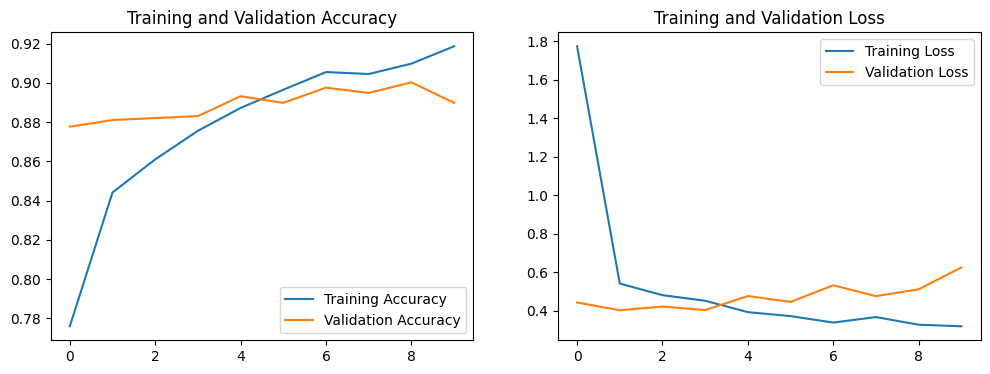

In [13]:
# Plot accuracy and loss over epochs
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### For improving

In [17]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, regularizers
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load the VGG16 model with pre-trained weights, excluding top layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model
base_model.trainable = False

# Data Augmentation for the training data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Just rescaling for validation/test data
test_datagen = ImageDataGenerator(rescale=1./255)

# Load the training and validation data
train_dir = '/content/seg_train/seg_train'
test_dir = '/content/seg_test/seg_test'

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Building the model
model = models.Sequential([
    base_model,  # Add the pre-trained VGG16 model without top layers
    layers.Flatten(),
    layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)),  # L2 regularization
    layers.Dropout(0.5),  # Dropout for regularization
    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.5),
    layers.Dense(6, activation='softmax')  # Adjust output layer for your dataset's number of classes (6 classes)
])

# Compile the model
model.compile(
    loss='categorical_crossentropy',
    optimizer=optimizers.Adam(learning_rate=1e-4),  # Lower learning rate for fine-tuning
    metrics=['accuracy']
)

# Fine-tuning: Unfreeze the last few layers of the base model for training
for layer in base_model.layers[-4:]:
    layer.trainable = True

# Retrain the model with the fine-tuned layers
history = model.fit(
    train_generator,
    epochs=20,  # Increase the number of epochs to give the model time to learn
    validation_data=test_generator,
    steps_per_epoch=train_generator.samples // 32,
    validation_steps=test_generator.samples // 32
)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.
Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


438/438 ━━━━━━━━━━━━━━━━━━━━ 220s 479ms/step - accuracy: 0.5871 - loss: 1.6109 - val_accuracy: 0.8750 - val_loss: 0.7454
Epoch 2/20
  1/438 ━━━━━━━━━━━━━━━━━━━━ 1:16 175ms/step - accuracy: 0.8750 - loss: 1.0741

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8750 - loss: 1.0741 - val_accuracy: 0.8333 - val_loss: 0.8824
Epoch 3/20
438/438 ━━━━━━━━━━━━━━━━━━━━ 255s 478ms/step - accuracy: 0.8281 - loss: 0.8820 - val_accuracy: 0.8794 - val_loss: 0.6601
Epoch 4/20
438/438 ━━━━━━━━━━━━━━━━━━━━ 0s 299us/step - accuracy: 0.9062 - loss: 0.6597 - val_accuracy: 0.9167 - val_loss: 0.5662
Epoch 5/20
438/438 ━━━━━━━━━━━━━━━━━━━━ 257s 465ms/step - accuracy: 0.8653 - loss: 0.7259 - val_accuracy: 0.8770 - val_loss: 0.6175
Epoch 6/20
438/438 ━━━━━━━━━━━━━━━━━━━━ 0s 305us/step - accuracy: 0.9375 - loss: 0.5286 - val_accuracy: 0.8333 - val_loss: 0.5763
Epoch 7/20
438/438 ━━━━━━━━━━━━━━━━━━━━ 260s 465ms/step - accuracy: 0.8793 - loss: 0.6318 - val_accuracy: 0.8931 - val_loss: 0.5628
Epoch 8/20
438/438 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.8750 - loss: 0.6051 - val_accuracy: 0.9167 - val_loss: 0.5540
Epoch 9/20
438/438 ━━━━━━━━━━━━━━━━━━━━ 256s 469ms/step - accuracy: 0.8871 - loss: 0.5875 - val_ac

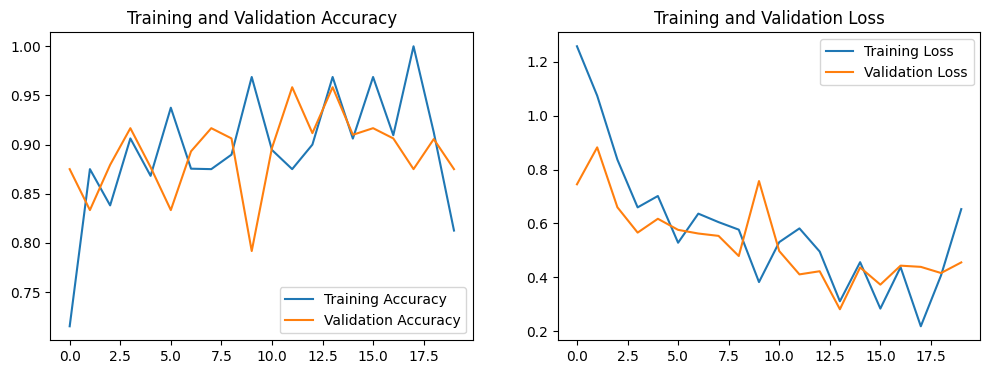

In [18]:
# Plot accuracy and loss over epochs
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()